In [4]:
import pandas as pd
import re

# Read the Excel file into a DataFrame
df = pd.read_excel('/Users/abiodunobafemi/Documents/Research/McNair/chatgpt-reddit-comments.xlsx')

# Drop any rows with missing values
df.dropna(inplace=True)

# Remove any leading or trailing whitespaces from the columns
df['comment_id'] = df['comment_id'].str.strip()
df['comment_parent_id'] = df['comment_parent_id'].str.strip()
df['comment_body'] = df['comment_body'].str.strip()
df['subreddit'] = df['subreddit'].str.strip()

# Remove any special characters or symbols from the comment_body column
df['comment_body'] = df['comment_body'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Convert the columns to the appropriate data types if needed
df['comment_id'] = df['comment_id'].astype(str)
df['comment_parent_id'] = df['comment_parent_id'].astype(str)
df['comment_body'] = df['comment_body'].astype(str)
df['subreddit'] = df['subreddit'].astype(str)

# Print the cleaned DataFrame
print(df)

TypeError: expected string or bytes-like object

In [5]:
import pandas as pd
import re

# Read the Excel file into a DataFrame
df = pd.read_excel('/Users/abiodunobafemi/Documents/Research/McNair/chatgpt-reddit-comments.xlsx')

# Drop any rows with missing values
df.dropna(inplace=True)

# Remove any leading or trailing whitespaces from the columns
df['comment_id'] = df['comment_id'].str.strip()
df['comment_parent_id'] = df['comment_parent_id'].str.strip()
df['subreddit'] = df['subreddit'].str.strip()

# Convert the comment_body column to string type
df['comment_body'] = df['comment_body'].astype(str)

# Remove any special characters or symbols from the comment_body column
df['comment_body'] = df['comment_body'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Convert the columns to the appropriate data types if needed
df['comment_id'] = df['comment_id'].astype(str)
df['comment_parent_id'] = df['comment_parent_id'].astype(str)
df['subreddit'] = df['subreddit'].astype(str)

# Print the cleaned DataFrame
print(df)

           g comment_id comment_parent_id  \
0          0    iztdxuh         t3_zj2aeu   
1          1    iztn0q0         t3_zj2aeu   
2          2    izudrph         t3_zj2aeu   
3          3    iztfhtb         t3_zj2aeu   
4          4    izu2as9         t3_zj2aeu   
...      ...        ...               ...   
52410  16667    j4lbiix        t1_j4kgcac   
52411  16668    j5m0v6m        t3_10jmvpj   
52412  16669    j5m6aj0        t1_j5m0v6m   
52413  16670    j5nylax        t1_j5m0v6m   
52414  16671    j5mwpdr        t1_j5m6aj0   

                                            comment_body     subreddit  
0      Ive been shocked for days now I dont need clic...     r/ChatGPT  
1       \n\nI am so angry right now I just wasted my ...     r/ChatGPT  
2      chatgpt karma whoring is here folks just when ...     r/ChatGPT  
3                                       Worked on me ngl     r/ChatGPT  
4      Certified 1010 mustsee moment It really did sh...     r/ChatGPT  
...                  

In [6]:
import pandas as pd
import re

# Read the Excel file into a DataFrame
df = pd.read_excel('/Users/abiodunobafemi/Documents/Research/McNair/chatgpt-reddit-comments.xlsx')

# Drop any rows with missing values
df.dropna(inplace=True)

# Remove any leading or trailing whitespaces from the columns
df['comment_id'] = df['comment_id'].str.strip()
df['comment_parent_id'] = df['comment_parent_id'].str.strip()
df['subreddit'] = df['subreddit'].str.strip()

# Convert the comment_body column to string type
df['comment_body'] = df['comment_body'].astype(str)

# Remove any special characters or symbols from the comment_body column
df['comment_body'] = df['comment_body'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Convert the columns to the appropriate data types if needed
df['comment_id'] = df['comment_id'].astype(str)
df['comment_parent_id'] = df['comment_parent_id'].astype(str)
df['subreddit'] = df['subreddit'].astype(str)

# Save the cleaned DataFrame to a new Excel file
output_path = 'cleaned_data.xlsx'
df.to_excel(output_path, index=False)

print("Cleaned data saved to", output_path)

Cleaned data saved to cleaned_data.xlsx


In [11]:
import pandas as pd
from textblob import TextBlob

# Specify the path to the Excel file
excel_file = '/Users/abiodunobafemi/Documents/Research/McNair/cleaned_data.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file)

# Handle missing values and non-string values in the 'comment_body' column
df['comment_body'] = df['comment_body'].fillna('')  # Fill NaN values with an empty string
df['comment_body'] = df['comment_body'].astype(str)  # Convert non-string values to string

# Apply sentiment analysis using TextBlob
df['polarity'] = df['comment_body'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['comment_body'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Save the DataFrame to a new Excel file
output_path = 'ChatGPT_TextBlob.xlsx'
df.to_excel(output_path, index=False)

print("Sentiment analysis results saved to", output_path)

Sentiment analysis results saved to ChatGPT_TextBlob.xlsx


In [15]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Creating an object of SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Specify the path to the Excel file
excel_file = '/Users/abiodunobafemi/Documents/Research/McNair/cleaned_data.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file)

# Replace 'YOUR_COLUMN_NAME' with the actual column name from your Excel file
column_name = 'comment_body'

# Convert the column to strings
df[column_name] = df[column_name].astype(str)

# Show all Vader results -> negative, neutral, positive, compound (computed by normalizing the scores neg, neu, pos)
df['VaderScores'] = df[column_name].apply(lambda text: sid.polarity_scores(text))

# Show only the compound score
df['Compound'] = df[column_name].apply(lambda text: sid.polarity_scores(text)['compound'])

# Save the DataFrame to a new Excel file
output_path = 'ChatGPT_Vader.xlsx'
df.to_excel(output_path, index=False)

print("Vader sentiment analysis results saved to", output_path)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/abiodunobafemi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Vader sentiment analysis results saved to ChatGPT_Vader.xlsx


In [17]:
import pandas as pd
from gensim.models import Word2Vec
import warnings
from nltk.tokenize import word_tokenize
warnings.filterwarnings('ignore')

# Specify the path to the Excel file
excel_file = '/Users/abiodunobafemi/Documents/Research/McNair/cleaned_data.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file)

text = df["comment_body"]  # Looks at the "comment_body" column in the file
tokenized_list = []  # Empty list

for i in range(len(text)):
    tokenized_sentences = word_tokenize(str(text[i]))  # Tokenizes each tweet
    tokenized_list.append(tokenized_sentences)  # Appends each tokenized tweet to the list

# Train Word2Vec model
model = Word2Vec(tokenized_list, min_count=1)

# Print the ten most similar words to 'covid'
print(model.wv.most_similar('ChatGPT'))

# Save the Word2Vec model
model.save("word2vec_model.bin")

[('chatGPT', 0.8965131044387817), ('chatgpt', 0.8817836046218872), ('GPT', 0.7590659260749817), ('it', 0.7378067374229431), ('Chatgpt', 0.7110722064971924), ('google', 0.6873907446861267), ('AI', 0.6581510901451111), ('Google', 0.6538519859313965), ('chatbot', 0.648842990398407), ('Wikipedia', 0.6454297304153442)]


In [20]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import word_tokenize

# Specify the path to the Excel file
excel_file = '/Users/abiodunobafemi/Documents/Research/McNair/cleaned_data.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file)

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

text = df["comment_body"]
for i in range(len(text.head(100))):
    tokenized_text = word_tokenize(text[i])
    emotion_scores = sia.polarity_scores(text[i])
    print('\n', text[i], ':')
    for emotion, score in emotion_scores.items():
        print(emotion, ':', score)


 Ive been shocked for days now I dont need clickbait :
neg : 0.223
neu : 0.777
pos : 0.0
compound : -0.3182

  

I am so angry right now I just wasted my time reading a post on this sub that had a clickbait title and it was all because of ChatGPT I cant believe that this machine learning model was able to trick me into thinking that the post was interesting when it was actually just a bunch of meaningless garbage

I am so sick and tired of ChatGPT and its ability to generate fake titles and content that is designed to trick people into clicking on them This is not the first time that ChatGPT has fooled me and I am sure it wont be the last But I am not going to stand for it anymore

I demand that the moderators of this sub take action against ChatGPT and its creators We need to put a stop to this trickery and we need to hold ChatGPT accountable for the harm it is causing to this community I am tired of being deceived by this machine and I will not stand for it any longer

So if you are

In [23]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize

# Specify the path to the Excel file
excel_file = '/Users/abiodunobafemi/Documents/Research/McNair/cleaned_data.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file)

# Convert the 'comment_body' column to strings
df['comment_body'] = df['comment_body'].astype(str)

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

text = df["comment_body"]

emotions = []
scores = []

for i in range(len(text)):
    sentences = sent_tokenize(text[i])
    emotion_scores = sia.polarity_scores(text[i])
    emotions.append(emotion_scores)
    scores.append(emotion_scores)

# Create a new DataFrame with emotions and scores
result_df = pd.DataFrame({'Emotions': emotions, 'Scores': scores})

# Save the DataFrame to a new Excel file
output_path = 'ChatGPT_EmotionAnalysis.xlsx'
result_df.to_excel(output_path, index=False)

print("Emotion analysis results saved to", output_path)

Emotion analysis results saved to ChatGPT_EmotionAnalysis.xlsx


In [25]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 2.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [26]:
from wordcloud import WordCloud, STOPWORDS

with open(r"/Users/abiodunobafemi/Documents/Research/McNair/chatgpt-reddit-comments.xlsx") as f:
    contents = f.read()

stop_words = STOPWORDS.update(["us", "medallists"])
wordcloud = WordCloud(stopwords = stop_words, background_color='white', height=400, width=400, collocations = False, max_words = 20, relative_scaling = 0).generate(contents)
plt.figure(figsize=(17,12))
plt.tight_layout(pad=0)
plt.clf()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloud.to_file('wordcloudPost.png')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 14: invalid start byte

In [27]:
import pandas as pd
from gensim.models import Word2Vec
import warnings
from nltk.tokenize import word_tokenize
warnings.filterwarnings('ignore')

# Specify the path to the Excel file
excel_file = '/Users/abiodunobafemi/Documents/Research/McNair/cleaned_data.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file)

text = df["comment_body"]  # Looks at the "comment_body" column in the file
tokenized_list = []  # Empty list

for i in range(len(text)):
    tokenized_sentences = word_tokenize(str(text[i]))  # Tokenizes each tweet
    tokenized_sentences = [word.replace('chatgpt', 'ChatGPT') for word in tokenized_sentences]
    tokenized_sentences = [word.replace('chatGPT', 'ChatGPT') for word in tokenized_sentences]
    tokenized_sentences = [word.replace('gpt', 'ChatGPT') for word in tokenized_sentences]
    tokenized_sentences = [word.replace('Chatgpt', 'ChatGPT') for word in tokenized_sentences]
    tokenized_list.append(tokenized_sentences)  # Appends each tokenized tweet to the list

# Train Word2Vec model
model = Word2Vec(tokenized_list, min_count=1)

# Print the ten most similar words to 'ChatGPT'
print(model.wv.most_similar('ChatGPT'))

# Save the Word2Vec model
model.save("word2vec_model.bin")

[('GPT', 0.8401607275009155), ('google', 0.7581016421318054), ('it', 0.7458393573760986), ('AI', 0.6944647431373596), ('ChatChatGPT', 0.6904420852661133), ('ai', 0.675425112247467), ('bot', 0.6670490503311157), ('Google', 0.6638880968093872), ('chatbot', 0.6555054783821106), ('Wikipedia', 0.6226525902748108)]


In [29]:
import pandas as pd
from gensim.models import Word2Vec
import warnings
from nltk.tokenize import word_tokenize
warnings.filterwarnings('ignore')

# Specify the path to the Excel file
excel_file = '/Users/abiodunobafemi/Documents/Research/McNair/cleaned_data.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file)

text = df["comment_body"]  # Looks at the "comment_body" column in the file
tokenized_list = []  # Empty list

for i in range(len(text)):
    tokenized_sentences = word_tokenize(str(text[i]))  # Tokenizes each tweet
    tokenized_sentences = [word.lower() for word in tokenized_sentences]  # Convert words to lowercase
    tokenized_list.append(tokenized_sentences)  # Appends each tokenized tweet to the list

# Train Word2Vec model
model = Word2Vec(tokenized_list, min_count=1)

# Convert the target word to lowercase
target_word = 'ChatGPT'.lower()

# Find the most similar words to the target word
similar_words = model.wv.most_similar(target_word)

# Filter out similar words that are spelled differently
filtered_words = []
for word, similarity in similar_words:
    if word.lower() not in filtered_words:
        filtered_words.append(word.lower())

# Print the filtered words
print(filtered_words)

# Save the Word2Vec model
model.save("word2vec_model.bin")

['it', 'gpt', 'chatbot', 'ai', 'google', 'chatgtp', 'itself', 'wikipedia', 'gpt3', 'code']


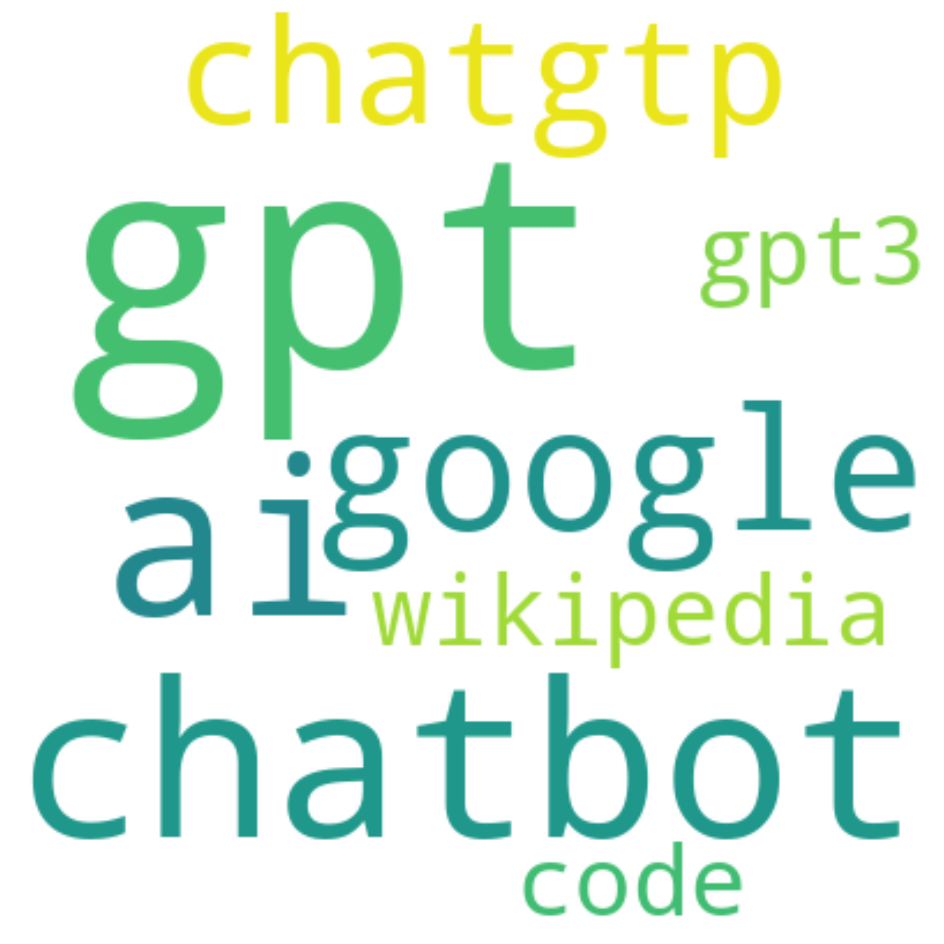

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Specify the path to the Excel file
excel_file = '/Users/abiodunobafemi/Documents/Research/McNair/chatgpt-reddit-comments.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file)

# Extract the topics as a list
topics = ['it', 'gpt', 'chatbot', 'ai', 'google', 'chatgtp', 'itself', 'wikipedia', 'gpt3', 'code']

# Concatenate the topics into a single string
contents = ' '.join(topics)

# Define the stop words to exclude from the word cloud
stop_words = STOPWORDS.update(["us", "medallists"])

# Generate the word cloud
wordcloud = WordCloud(stopwords=stop_words, background_color='white', height=400, width=400, collocations=False, max_words=20, relative_scaling=0).generate(contents)

# Display the word cloud
plt.figure(figsize=(17, 12))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Save the word cloud to a file
wordcloud.to_file('wordcloudPost.png')

In [34]:
# import xlsxwriter module
import xlsxwriter
from nrclex import NRCLex as NL
import pandas as pan

# Workbook() takes one, non-optional, argument
# which is the filename that we want to create.
workbook = xlsxwriter.Workbook('ChatGPT_NRCLexicon.xlsx', {'nan_inf_to_errors': True})
 
# The workbook object is then used to add new
# worksheet via the add_worksheet() method.
worksheet = workbook.add_worksheet()

sheet = pan.read_excel(r'/Users/abiodunobafemi/Documents/Research/McNair/cleaned_data.xlsx', engine='openpyxl')


# Use the worksheet object to write
# data via the write() method.
worksheet.write('A1', 'Comments')
worksheet.write('B1', 'Fear')
worksheet.write('C1', 'Anger')
worksheet.write('D1', 'Anticipation')
worksheet.write('E1', 'Trust')
worksheet.write('F1', 'Surprise')
worksheet.write('G1', 'Positive')
worksheet.write('H1', 'Negative')
worksheet.write('I1', 'Sadness')
worksheet.write('J1', 'Disgust')
worksheet.write('K1', 'Joy')

text = sheet["comment_body"]
i=0
j=1
for i in range(len(text)):
    worksheet.write(j, 0, text[i])
    emotion = NL(text[i])
    d = dict(emotion.top_emotions)

    for k, v in d.items():
        # print(d.items(), k)
        if k == 'fear':
            worksheet.write(j, 1, v)
        elif 'fear' not in d.keys():
            worksheet.write(j, 1, 0)
        if k == 'anger':
            worksheet.write(j, 2, v)
        elif 'anger' not in d.keys():
            worksheet.write(j, 2, 0)
        if k == 'anticipation':
            worksheet.write(j, 3, v)
        elif 'anticipation' not in d.keys():
            worksheet.write(j, 3, 0)
        if k == 'trust':
            worksheet.write(j, 4, v)
        elif 'trust' not in d.keys():
            worksheet.write(j, 4, 0)
        if k == 'surprise':
            worksheet.write(j, 5, v)
        elif 'surprise' not in d.keys():
            worksheet.write(j, 5, 0)
        if k == 'positive':
            worksheet.write(j, 6, v)
        elif 'positive' not in d.keys():
            worksheet.write(j, 6, 0)
        if k == 'negative':
            worksheet.write(j, 7, v)
        elif 'negative' not in d.keys():
            worksheet.write(j, 7, 0)
        if k == 'sadness':
            worksheet.write(j, 8, v)
        elif 'sadness' not in d.keys():
            worksheet.write(j, 8, 0)
        if k == 'disgust':
            worksheet.write(j, 9, v)
        elif 'disgust' not in d.keys():
            worksheet.write(j, 9, 0)
        if k == 'joy':
            worksheet.write(j, 10, v)
        elif 'joy' not in d.keys():
            worksheet.write(j, 10, 0)

    i=i+1
    j=j+1


# Finally, close the Excel file
# via the close() method.
workbook.close()

TypeError: The `text` argument passed to `__init__(text)` must be a string, not <class 'float'>

In [39]:
import pandas as pd
from gensim.models import Word2Vec
import warnings
from nltk.tokenize import word_tokenize

warnings.filterwarnings('ignore')

# Specify the path to the Excel file
excel_file = '/Users/abiodunobafemi/Documents/Research/McNair/cleaned_data.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file)

text = df["comment_body"]  # Looks at the "comment_body" column in the file
tokenized_list = []  # Empty list

for i in range(len(text)):
    tokenized_sentences = word_tokenize(str(text[i]))  # Tokenizes each comment
    tokenized_sentences = [word.lower() for word in tokenized_sentences]  # Convert words to lowercase
    tokenized_list.append(tokenized_sentences)  # Appends each tokenized comment to the list

# Train Word2Vec model
model = Word2Vec(tokenized_list, min_count=1, workers=4, epochs=100)

# Convert the target word to lowercase
target_word = 'ChatGPT'.lower()

# Find the most similar words to the target word
similar_words = model.wv.most_similar(target_word, topn=20)  # Modify topn parameter to get 20 similar words

# Filter out similar words that are spelled differently
filtered_words = []
for word, similarity in similar_words:
    if word.lower() not in filtered_words:
        filtered_words.append(word.lower())

# Print the filtered words
print(filtered_words)

# Save the Word2Vec model
model.save("word2vec_model.bin")

['it', 'gpt', 'ai', 'chatgtp', 'google', 'openai', 'cgpt', 'gpt3', 'this', 'something', 'bot', 'chatbot', 'itself', 'that', 'bing', 'youchat', 'chatgp', 'op', 'gpt4', 'characterai']


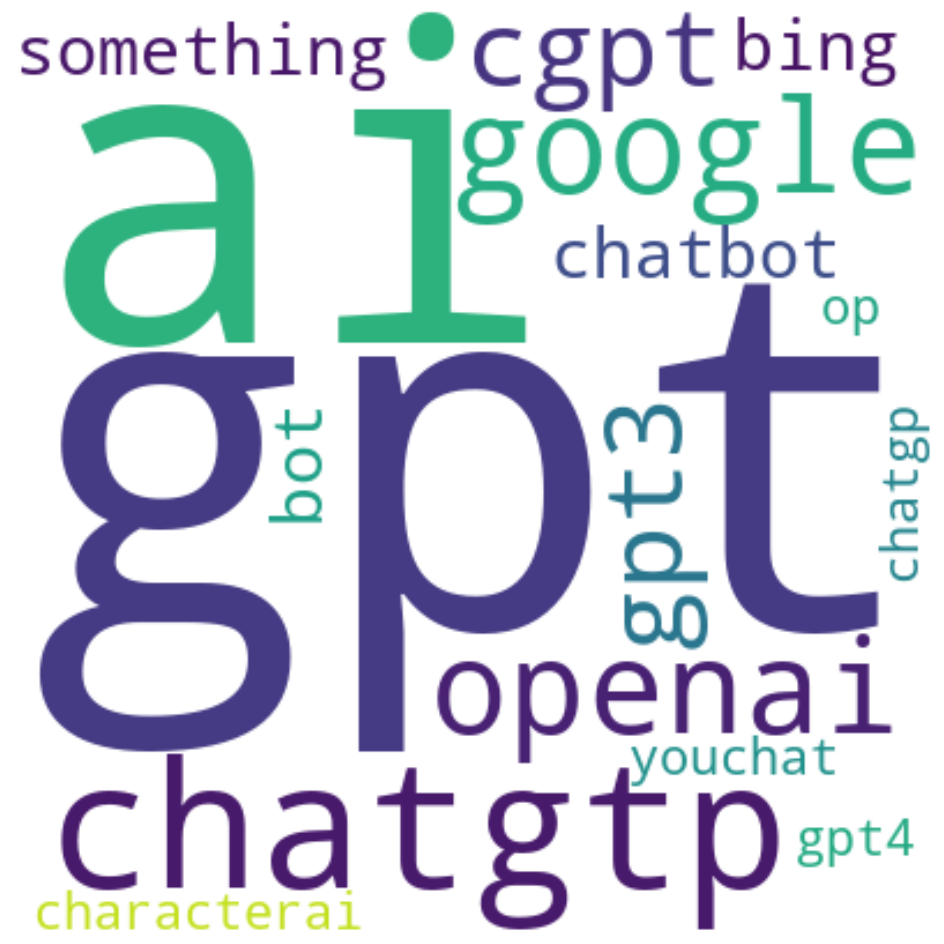

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Specify the path to the Excel file
excel_file = '/Users/abiodunobafemi/Documents/Research/McNair/chatgpt-reddit-comments.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file)

# Extract the topics as a list
topics = ['it', 'gpt', 'ai', 'chatgtp', 'google', 'openai', 'cgpt', 'gpt3', 'this', 'something', 'bot', 'chatbot', 'itself', 'that', 'bing', 'youchat', 'chatgp', 'op', 'gpt4', 'characterai']

# Concatenate the topics into a single string
contents = ' '.join(topics)

# Define the stop words to exclude from the word cloud
stop_words = STOPWORDS.update(["us", "medallists"])

# Generate the word cloud
wordcloud = WordCloud(stopwords=stop_words, background_color='white', height=400, width=400, collocations=False, max_words=20, relative_scaling=0).generate(contents)

# Display the word cloud
plt.figure(figsize=(17, 12))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Save the word cloud to a file
wordcloud.to_file('wordcloudTopics.png')

In [1]:
import xlsxwriter
from nrclex import NRCLex as NL
import pandas as pd

# Read the Excel file into a DataFrame
filepath = '/Users/abiodunobafemi/Documents/Research/McNair/cleaned_data.xlsx'
df = pd.read_excel(filepath)  # Use read_excel for Excel files

# Drop rows with NaN values in the 'Text' column (change column name to match your dataset)
df = df.dropna(subset=['comment_body'])

# Create a new Excel workbook and worksheet
workbook = xlsxwriter.Workbook('Reddit_NRC_Sentiments.xlsx')
worksheet = workbook.add_worksheet()

# Write headers to the worksheet
worksheet.write('A1', 'Tweets')
worksheet.write('B1', 'Fear')
worksheet.write('C1', 'Anger')
worksheet.write('D1', 'Anticipation')
worksheet.write('E1', 'Trust')
worksheet.write('F1', 'Surprise')
worksheet.write('G1', 'Positive')
worksheet.write('H1', 'Negative')
worksheet.write('I1', 'Sadness')
worksheet.write('J1', 'Disgust')
worksheet.write('K1', 'Joy')

# Iterate over the rows of the DataFrame
for i, row in df.iterrows():
    text = row['comment_body']  # Modify 'Text' to match the actual column name in your dataset
    emotion = NL(text)
    d = dict(emotion.top_emotions)
    
    # Write the text to the worksheet
    worksheet.write(i + 1, 0, text)
    
    # Write sentiment values to the worksheet
    for k in ['fear', 'anger', 'anticipation', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy']:
        if k in d:
            worksheet.write(i + 1, ['fear', 'anger', 'anticipation', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy'].index(k) + 1, d[k])
        else:
            worksheet.write(i + 1, ['fear', 'anger', 'anticipation', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy'].index(k) + 1, 0)

# Close the Excel workbook
workbook.close()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Specify the path to the Excel file
excel_file = '/Users/abiodunobafemi/Documents/Research/McNair/cleaned_data.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file)

# Extract the topics as a list
topics = ['it', 'gpt', 'ai', 'chatgtp', 'google', 'openai', 'cgpt', 'gpt3', 'this', 'something', 'bot', 'chatbot', 'itself', 'that', 'bing', 'youchat', 'chatgp', 'op', 'gpt4', 'characterai']

# Concatenate the topics into a single string
contents = ' '.join(topics)

# Define the stop words to exclude from the word cloud
stop_words = STOPWORDS.update(["us", "medallists"])

# Generate the word cloud
wordcloud = WordCloud(stopwords=stop_words, background_color='white', height=400, width=400, collocations=False, max_words=50, relative_scaling=0).generate(contents)

# Display the word cloud
plt.figure(figsize=(17, 12))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Save the word cloud to a file
wordcloud.to_file('Reddit_ChatGPT_WordCloud.png')

In [2]:
import pandas as pd
from gensim.models import Word2Vec
import warnings
from nltk.tokenize import word_tokenize

warnings.filterwarnings('ignore')

# Specify the path to the Excel file
excel_file = '/Users/abiodunobafemi/Documents/Research/McNair/cleaned_data.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file)

text = df["comment_body"]  # Looks at the "comment_body" column in the file
tokenized_list = []  # Empty list

for i in range(len(text)):
    tokenized_sentences = word_tokenize(str(text[i]))  # Tokenizes each comment
    tokenized_sentences = [word.lower() for word in tokenized_sentences]  # Convert words to lowercase
    tokenized_list.append(tokenized_sentences)  # Appends each tokenized comment to the list

# Train Word2Vec model
model = Word2Vec(tokenized_list, min_count=1, workers=4, epochs=100)

# Convert the target word to lowercase
target_word = 'ChatGPT'.lower()

# Find the most similar words to the target word
similar_words = model.wv.most_similar(target_word, topn=50)  # Modify topn parameter to get 20 similar words

# Filter out similar words that are spelled differently
filtered_words = []
for word, similarity in similar_words:
    if word.lower() not in filtered_words:
        filtered_words.append(word.lower())

# Print the filtered words
print(filtered_words)

# Save the Word2Vec model
model.save("word2vec_model.bin")

['it', 'gpt', 'ai', 'chatgtp', 'openai', 'cgpt', 'this', 'google', 'gpt3', 'chatbot', 'bot', 'something', 'itself', 'characterai', 'that', 'youchat', 'gpt4', 'code', 'novelai', 'chatgp', 'op', 'chatgpt3', 'bing', 'wikipedia', 'copilot', 'api', 'you', 'pycurl', 'lamda', 'tool', 'someone', 'ffmpeg', 'toprecision1000', 'dalle2', 'gpt2', 'anything', 'chatgbt', 'i', 'turnitin', 'database', 'gui', 'chatgptsddalle', 'chatgpts', 'what', 'he', 'gan', 'text', 'anyone', 'plugin', 'objectionbusters']


['it', 'chatgtp', 'gpt', 'ai', 'openai', 'google', 'gpt3', 'cgpt', 'chatbot', 'something', 'bot', 'characterai', 'chatgpt3', 'bing', 'gpt4', 'copilot', 'code', 'youchat', 'op', 'turnitin', 'novelai', 'chatgp', 'chatgbt', 'wikipedia', 'lamda', 'text', 'them', 'tool', 'plugin', 'api', 'youcom', 'gan', 'prompts', 'model', 'ddg', 'gpt2', 'chat', 'dan', 'ffmpeg', 'me', 'objectionbusters']


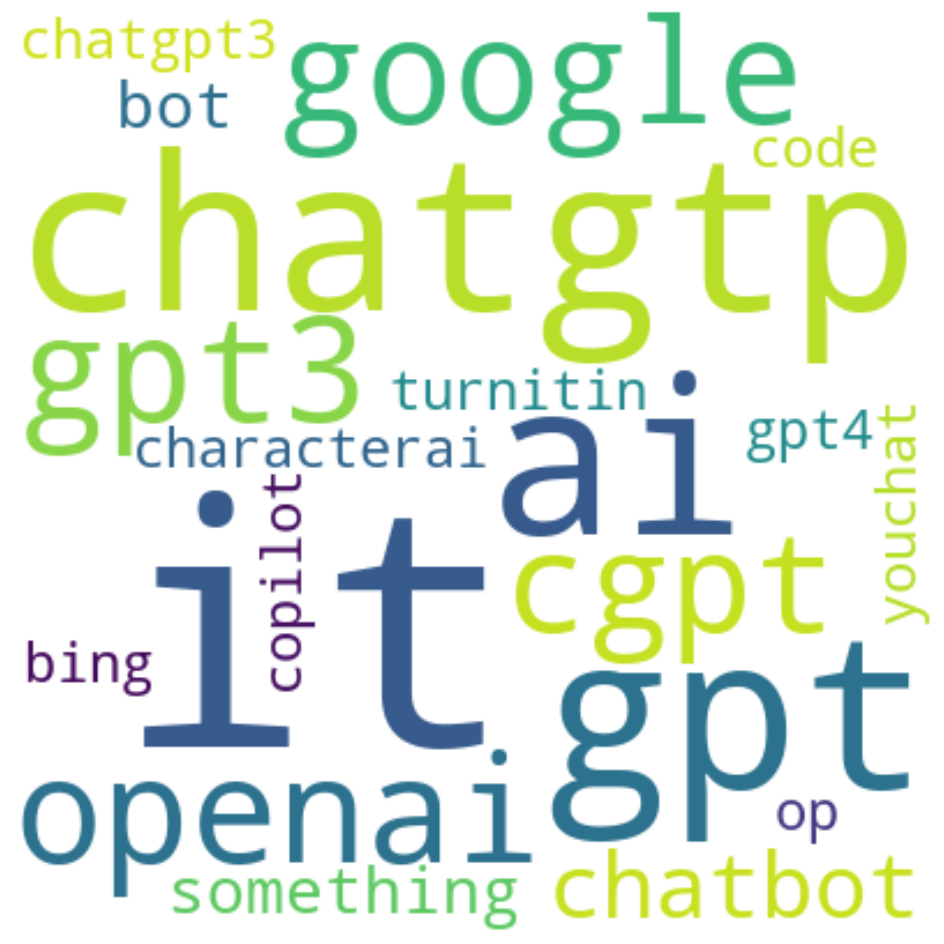

In [3]:
import pandas as pd
from gensim.models import Word2Vec
import warnings
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# Specify the path to the Excel file
excel_file = '/Users/abiodunobafemi/Documents/Research/McNair/cleaned_data.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file)

text = df["comment_body"]  # Looks at the "comment_body" column in the file
tokenized_list = []  # Empty list

for i in range(len(text)):
    tokenized_sentences = word_tokenize(str(text[i]))  # Tokenizes each comment
    tokenized_sentences = [word.lower() for word in tokenized_sentences]  # Convert words to lowercase
    tokenized_list.append(tokenized_sentences)  # Appends each tokenized comment to the list

# Train Word2Vec model
model = Word2Vec(tokenized_list, min_count=1, workers=4, epochs=100)

# Convert the target word to lowercase
target_word = 'ChatGPT'.lower()

# Find the most similar words to the target word
similar_words = model.wv.most_similar(target_word, topn=50)  # Modify topn parameter to get 20 similar words

# Define stopwords that you want to exclude
stopwords = ['he', 'this', 'itself', 'that', 'you', 'someone', 'anything', 'i', 'chatgpts', 'what', 'anyone']  # Add your own stopwords

# Filter out similar words that are spelled differently or are in the stopwords list
filtered_words = []
for word, similarity in similar_words:
    word_lower = word.lower()
    if word_lower not in filtered_words and word_lower not in stopwords:
        filtered_words.append(word_lower)

# Print the filtered words
print(filtered_words)

# Generate the word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color='white', height=400, width=400, collocations=False, max_words=20, relative_scaling=0).generate(' '.join(filtered_words))

# Display the word cloud
plt.figure(figsize=(17, 12))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Save the word cloud to a file
wordcloud.to_file('Reddit_WordCloud.png')

# Save the Word2Vec model
model.save("word2vec_model.bin")

['it', 'gpt', 'ai', 'gpt3', 'openai', 'google', 'bot', 'chatbot', 'code', 'chatgpt3', 'gpt4', 'youchat', 'characterai', 'bing', 'op', 'copilot', 'novelai', 'ffmpeg', 'lamda', 'api', 'wikipedia', 'turnitin', 'pycurl', 'gpt2', 'inputprocessingoutput', 'text', 'tool', 'chatgbt', 'objectionbusters', 'toprecision1000', 'actually', 'dan', 'alpha', 'chat']


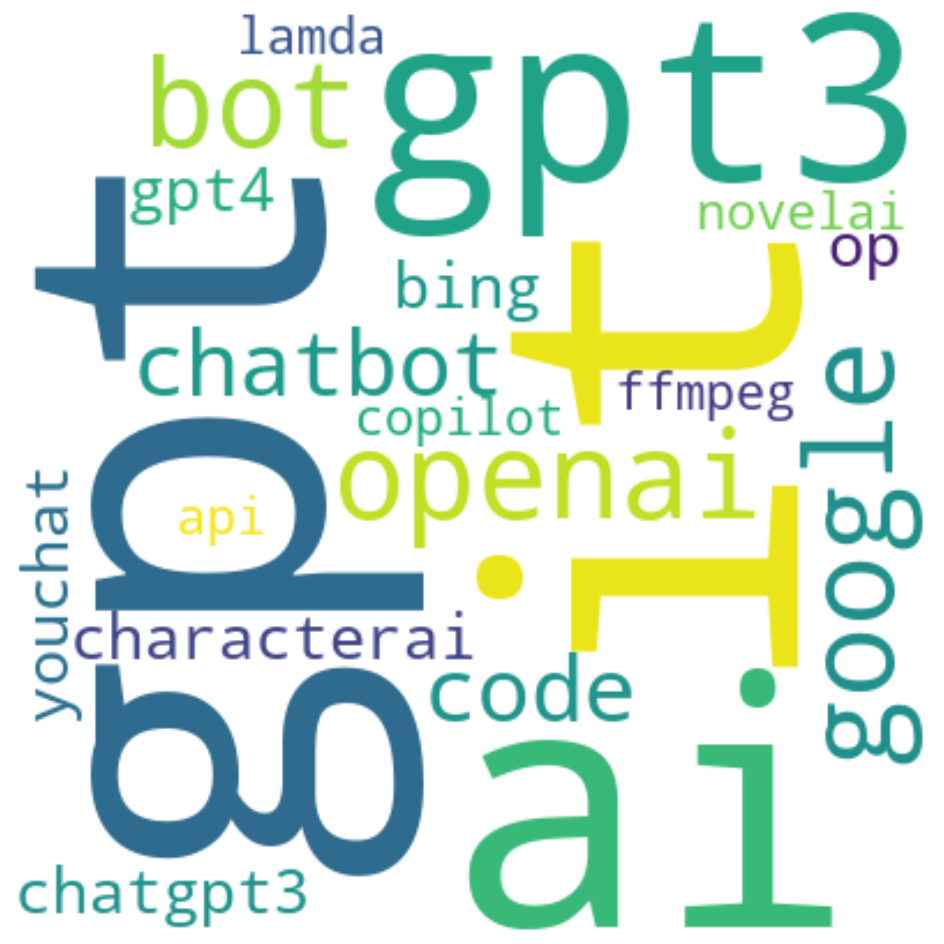

In [4]:
import pandas as pd
from gensim.models import Word2Vec
import warnings
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# Specify the path to the Excel file
excel_file = '/Users/abiodunobafemi/Documents/Research/McNair/cleaned_data.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file)

text = df["comment_body"]  # Looks at the "comment_body" column in the file
tokenized_list = []  # Empty list

for i in range(len(text)):
    tokenized_sentences = word_tokenize(str(text[i]))  # Tokenizes each comment
    tokenized_sentences = [word.lower() for word in tokenized_sentences]  # Convert words to lowercase
    tokenized_list.append(tokenized_sentences)  # Appends each tokenized comment to the list

# Train Word2Vec model
model = Word2Vec(tokenized_list, min_count=1, workers=4, epochs=100)

# Convert the target word to lowercase
target_word = 'ChatGPT'.lower()

# Find the most similar words to the target word
similar_words = model.wv.most_similar(target_word, topn=50)  # Modify topn parameter to get 20 similar words

# Define stopwords that you want to exclude
stopwords = ['he', 'this', 'itself', 'that', 'you', 'someone', 'anything', 'i', 'chatgpts', 'what', 'anyone', 'chatgp', 'me', 'them', 'something', 'chatgtp', 'cgpt']  # Add your own stopwords

# Filter out similar words that are spelled differently or are in the stopwords list
filtered_words = []
for word, similarity in similar_words:
    word_lower = word.lower()
    if word_lower not in filtered_words and word_lower not in stopwords:
        filtered_words.append(word_lower)

# Print the filtered words
print(filtered_words)

# Generate the word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color='white', height=400, width=400, collocations=False, max_words=20, relative_scaling=0).generate(' '.join(filtered_words))

# Display the word cloud
plt.figure(figsize=(17, 12))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Save the word cloud to a file
wordcloud.to_file('Reddit_WordCloud.png')

# Save the Word2Vec model
model.save("word2vec_model.bin")

['it', 'gpt', 'ai', 'openai', 'google', 'gpt3', 'bot', 'chatbot', 'chatgpt3', 'characterai', 'gpt4', 'code', 'bing', 'youchat', 'copilot', 'novelai', 'op', 'turnitin', 'lamda', 'wikipedia', 'pycurl', 'ffmpeg', 'objectionbusters', 'plugin', 'api', 'prompts', 'tool', 'text', 'chatgptsddalle', 'model', 'youcom', 'wordpress', 'gui', 'playground', 'actually']


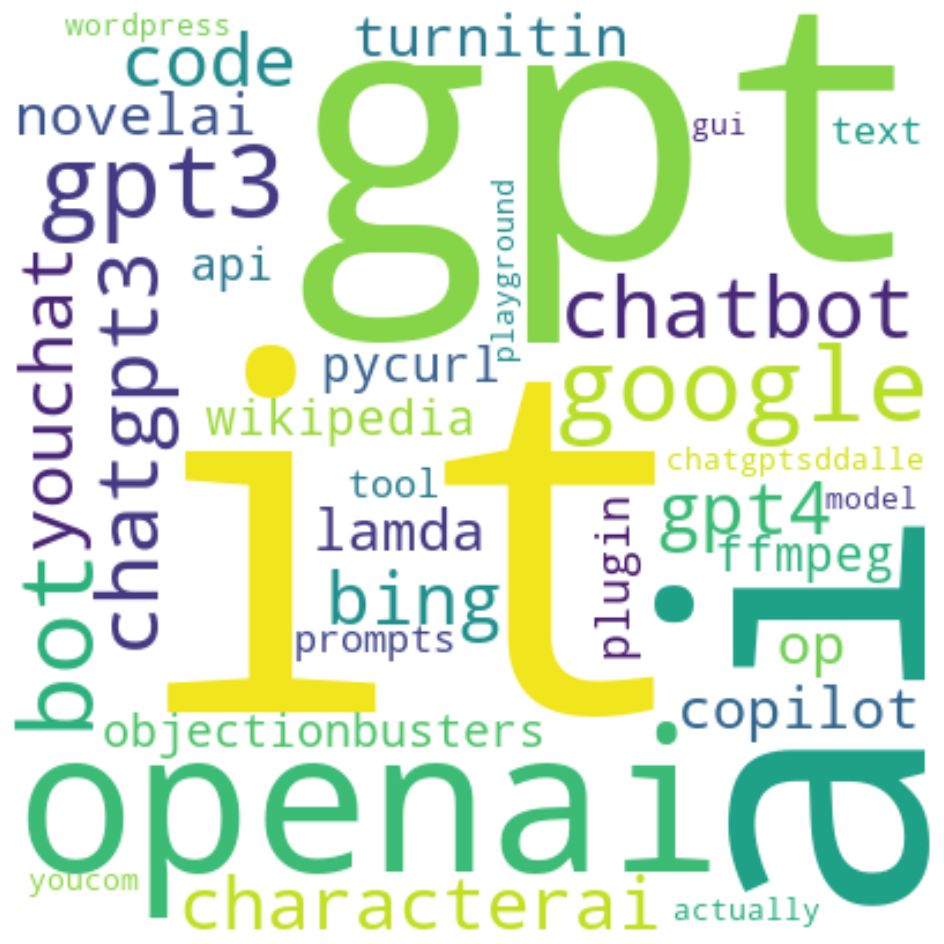

In [2]:
import pandas as pd
from gensim.models import Word2Vec
import warnings
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# Specify the path to the Excel file
excel_file = '/Users/abiodunobafemi/Documents/Research/McNair/cleaned_data.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file)

text = df["comment_body"]  # Looks at the "comment_body" column in the file
tokenized_list = []  # Empty list

for i in range(len(text)):
    tokenized_sentences = word_tokenize(str(text[i]))  # Tokenizes each comment
    tokenized_sentences = [word.lower() for word in tokenized_sentences]  # Convert words to lowercase
    tokenized_list.append(tokenized_sentences)  # Appends each tokenized comment to the list

# Train Word2Vec model
model = Word2Vec(tokenized_list, min_count=1, workers=4, epochs=100)

# Convert the target word to lowercase
target_word = 'ChatGPT'.lower()

# Find the most similar words to the target word
similar_words = model.wv.most_similar(target_word, topn=50)  # Modify topn parameter to get 20 similar words

# Define stopwords that you want to exclude
stopwords = ['he', 'this', 'itself', 'that', 'you', 'someone', 'anything', 'i', 'chatgpts', 'what', 'anyone', 'chatgp', 'me', 'them', 'something', 'chatgtp', 'cgpt', 'chatgbt']  # Add your own stopwords

# Filter out similar words that are spelled differently or are in the stopwords list
filtered_words = []
for word, similarity in similar_words:
    word_lower = word.lower()
    if word_lower not in filtered_words and word_lower not in stopwords:
        filtered_words.append(word_lower)

# Print the filtered words
print(filtered_words)

# Generate the word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color='white', height=400, width=400, collocations=False, max_words=50, relative_scaling=0).generate(' '.join(filtered_words))


# Display the word cloud
plt.figure(figsize=(17, 12))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Save the word cloud to a file
wordcloud.to_file('Reddit_WordCloud.png')

# Save the Word2Vec model
model.save("word2vec_model.bin")

['.', '#', 'ai', '?', '@', ',', '!', 'a', 'gpt', 'chat', '-', '``', ';', 'it', "''", ')', '&', 'google', 'openai', '...', 'tech', 'marketing', 'the', '*', '(', 'amp', 'data', 'r√©solvant', 'bot', 'in', 'gpt3', 'and', 'twitter', 'chatbot', 'crypto', "'", '//t.co/mad7zw2emy', 'us', 'also', 'internet', 'video', '//t.co/kmk9xzf1k2', 'microsoft', 'art', ':', 'any', '//t.co/wlrghj0lso']


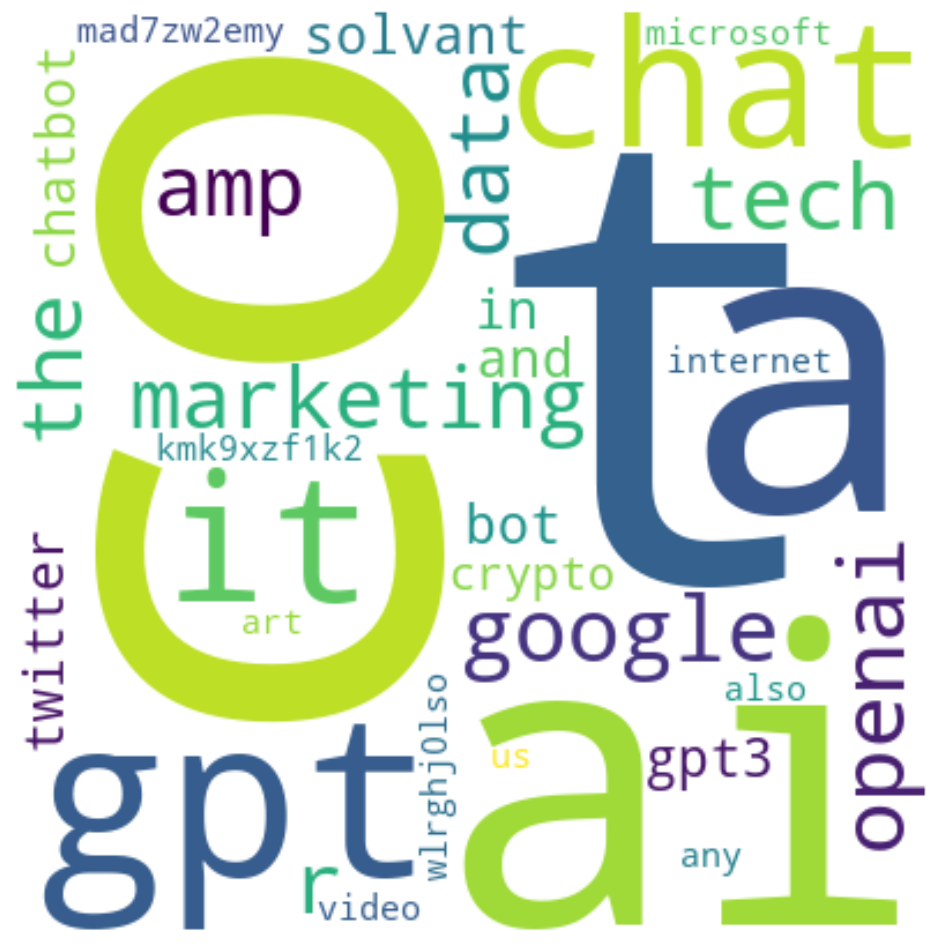

In [2]:
import pandas as pd
from gensim.models import Word2Vec
import warnings
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# Specify the path to the Excel file
excel_file = '/Users/abiodunobafemi/Documents/Research/McNair/chatgpt1.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file)

text = df["Text"]  # Looks at the "comment_body" column in the file
tokenized_list = []  # Empty list

for i in range(len(text)):
    tokenized_sentences = word_tokenize(str(text[i]))  # Tokenizes each comment
    tokenized_sentences = [word.lower() for word in tokenized_sentences]  # Convert words to lowercase
    tokenized_list.append(tokenized_sentences)  # Appends each tokenized comment to the list

# Train Word2Vec model
model = Word2Vec(tokenized_list, min_count=1, workers=4, epochs=100)

# Convert the target word to lowercase
target_word = 'ChatGPT'.lower()

# Find the most similar words to the target word
similar_words = model.wv.most_similar(target_word, topn=50)  # Modify topn parameter to get 20 similar words

# Define stopwords that you want to exclude
stopwords = ['he', 'this', 'itself', 'that', 'you', 'someone', 'anything', 'i', 'chatgpts', 'what', 'anyone', 'chatgp', 'me', 'them', 'something', 'chatgtp', 'cgpt', 'chatgbt']  # Add your own stopwords

# Filter out similar words that are spelled differently or are in the stopwords list
filtered_words = []
for word, similarity in similar_words:
    word_lower = word.lower()
    if word_lower not in filtered_words and word_lower not in stopwords:
        filtered_words.append(word_lower)

# Print the filtered words
print(filtered_words)

# Generate the word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color='white', height=400, width=400, collocations=False, max_words=50, relative_scaling=0).generate(' '.join(filtered_words))


# Display the word cloud
plt.figure(figsize=(17, 12))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Save the word cloud to a file
wordcloud.to_file('Twitter_WordCloud.png')

# Save the Word2Vec model
model.save("word2vec_model.bin")

In [8]:
import pandas as pd
import re

# Read the Excel file into a DataFrame
df = pd.read_excel('/Users/abiodunobafemi/Documents/Research/McNair/chatgpt1.xlsx')

# Remove leading and trailing whitespaces from all string columns
string_columns = df.select_dtypes(include=['object']).columns
df[string_columns] = df[string_columns].apply(lambda x: x.str.strip())

# Remove special characters or symbols from all string columns
df[string_columns] = df[string_columns].apply(lambda x: x.str.replace(r'[^\w\s]', ''))

# Convert numeric columns to appropriate data types
numeric_columns = ['ReplyCount', 'RetweetCount', 'LikeCount', 'QuoteCount', 'ConversationId']
df[numeric_columns] = df[numeric_columns].astype(int, errors='ignore')

# Save the cleaned DataFrame to a new Excel file
output_path = 'cleaned_data_twitter.xlsx'
df.to_excel(output_path, index=False)

print("Cleaned data saved to", output_path)

Cleaned data saved to cleaned_data_twitter.xlsx


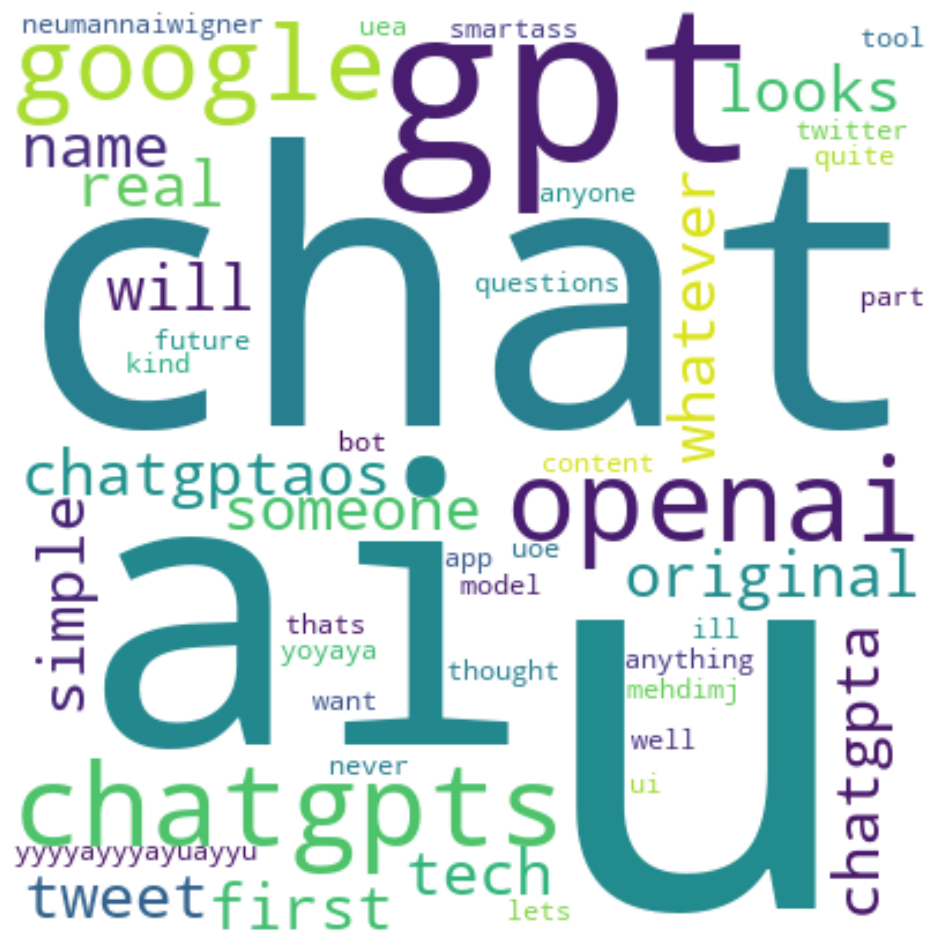

In [14]:
import pandas as pd
from gensim.models import Word2Vec
import warnings
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import unicodedata  # Import unicodedata library to handle accents

warnings.filterwarnings('ignore')

# Specify the path to the cleaned Excel file for Twitter data
excel_file = '/Users/abiodunobafemi/Documents/Research/cleaned_data_twitter.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file)

text = df["Text"]  # Looks at the "Text" column in the file
tokenized_list = []  # Empty list

# Define additional stopwords
additional_stopwords = ['http', 'https', 'www', 'com', 'co', 'amp', 'rt']

for i in range(len(text)):
    # Tokenize each comment and remove punctuation
    words = word_tokenize(str(text[i]))
    words = [word.lower() for word in words if word.isalpha()]
    # Remove stopwords and words with accents
    words = [unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8') for word in words]
    words = [word for word in words if word not in STOPWORDS]
    words = [word for word in words if word not in additional_stopwords]
    tokenized_list.append(words)

# Train Word2Vec model
model = Word2Vec(tokenized_list, min_count=1, workers=4, epochs=100)

# Convert the target word to lowercase
target_word = 'ChatGPT'.lower()

# Find the most similar words to the target word
similar_words = model.wv.most_similar(target_word, topn=50)  # Modify topn parameter to get 20 similar words

# Generate the word cloud
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=400, width=400, collocations=False, max_words=50, relative_scaling=0).generate(' '.join([word for word, _ in similar_words]))

# Display the word cloud
plt.figure(figsize=(17, 12))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Save the word cloud to a file
wordcloud.to_file('Twitter_WordCloud.png')

# Save the Word2Vec model
model.save("word2vec_model.bin")